# DSC530 Term Project 
## Caitie Schrotberger
### Fall 2024

Using TMBD 5000 Movies dataset from Kaggle, form a question/hypothesis based on the data elements.  
https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata/data

My hypothesis is that the most profitable movies come only from those sponsored by popular production companies.

The fields I will be using are:
- id/movie_id - the primary key for the data set
- originial_title - the title of the movie
- production_companies - the production company names associated with the title
- budget - the budget amount to create the movie
- revenue - the amount of revenue received from ticket sales of the movie
- vote_average - the average score based on user input, values of 1-10 with 10 being the best
- vote_count - the number of users who voted on the title
- release_date - the date the movie was released in theaters

In [3]:
import numpy as np 
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import thinkstats2
import thinkplot
import math
import matplotlib.pyplot as plt

Import Data

In [5]:
# Import data and produce top of data frame
movies = pd.read_csv('tmdb_5000_movies.csv')
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


Data Cleansing and manipulation

In [7]:
# Reduce number of fields included
movies = movies[['id','original_title','production_companies','budget','revenue','vote_average','vote_count','release_date']]

In [8]:
# Determine fields to clean
movies.isnull().sum()

id                      0
original_title          0
production_companies    0
budget                  0
revenue                 0
vote_average            0
vote_count              0
release_date            1
dtype: int64

In [9]:
# Remove nulls
movies.dropna(inplace=True)
movies.isnull().sum()

id                      0
original_title          0
production_companies    0
budget                  0
revenue                 0
vote_average            0
vote_count              0
release_date            0
dtype: int64

In [10]:
# Clean up lists with data frame
def clean_genres(x):
    l = []
    for i in eval(x):
        l.append(i['name'])
    return l
movies['production_companies'] = movies['production_companies'].apply(clean_genres)

In [11]:
# Clean up some of the budget and revenue fields that are incorrect.  Looked them up on IMDB.com
movies.loc[movies['id'] == 9647, 'budget'] = 32000000
movies.loc[movies['id'] == 9550, 'budget'] = 650000
movies.loc[movies['id'] == 9363, 'budget'] = 14000000
movies.loc[movies['id'] == 10074, 'budget'] = 25000000
movies.loc[movies['id'] == 14844, 'revenue'] = 12313323
movies.loc[movies['id'] == 108346, 'revenue'] = 12044
movies.loc[movies['id'] == 10944, 'revenue'] = 12009070
movies.loc[movies['id'] == 18475, 'revenue'] = 23726793
movies.loc[movies['id'] == 2196, 'revenue'] = 46789726

In [12]:
# Remove movies without revenue
movies2 = movies[movies['revenue'] > 0]

In [13]:
# Create field ProfitRate which is revenue divided by budget
movies2["ProfitRate"] = (movies2["revenue"] / movies2["budget"])

C:\Users\caiti\AppData\Local\Temp\ipykernel_10628\3091107199.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies2["ProfitRate"] = (movies2["revenue"] / movies2["budget"])


In [14]:
# Create fields that indicate if they use the top 5 or top 10 production companies
prod_co5 =['Warner Bros.', 'Universal Pictures', 'Paramount Pictures', 'Twentieth Century Fox Film Corporation', 'Columbia Pictures']
prod_co10 =['Warner Bros.', 'Universal Pictures', 'Paramount Pictures', 'Twentieth Century Fox Film Corporation', 'Columbia Pictures', 'New Line Cinema', 'Metro-Goldwyn-Mayer (MGM)', 'Touchstone Pictures', 'Walt Disney Pictures', 'Relativity Media']
movies2['Top5'] = movies2['production_companies'].apply(lambda x: any(item in x for item in prod_co5))
movies2['Top10'] = movies2['production_companies'].apply(lambda x: any(item in x for item in prod_co10))

C:\Users\caiti\AppData\Local\Temp\ipykernel_10628\2628709688.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies2['Top5'] = movies2['production_companies'].apply(lambda x: any(item in x for item in prod_co5))
C:\Users\caiti\AppData\Local\Temp\ipykernel_10628\2628709688.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies2['Top10'] = movies2['production_companies'].apply(lambda x: any(item in x for item in prod_co10))


In [15]:
def production_comp(x):
    if any('Warner Bros' in str(item) for item in x):
        return 'Warner Bros'
    elif any('Universal' in str(item) for item in x):
        return 'Universal'
    elif any('Paramount' in str(item) for item in x):
        return 'Paramount'
    elif any('Twentieth Century' in str(item) for item in x):
        return 'Twentieth Century'
    elif any('Columbia Pictures' in str(item) for item in x):
        return 'Columbia Pictures'
    elif any('New Line Cinema' in str(item) for item in x):
        return 'New Line Cinema'
    elif any('Metro-Goldwyn' in str(item) for item in x):
        return 'MGM'
    elif any('Touchstone' in str(item) for item in x):
        return 'Touchstone Pictures'
    elif any('Walt Disney' in str(item) for item in x):
        return 'Walt Disney Pictures'
    elif any('Relativity' in str(item) for item in x):
        return 'Relativity Media'
    else:
        return "other"
   
movies2['PC_List'] = movies2['production_companies'].apply(production_comp)
movies2.head()

C:\Users\caiti\AppData\Local\Temp\ipykernel_10628\4114076379.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies2['PC_List'] = movies2['production_companies'].apply(production_comp)


,id,original_title,production_companies,budget,revenue,vote_average,vote_count,release_date,ProfitRate,Top5,Top10,PC_List
0,19995,Avatar,"[Ingenious Film Partners, Twentieth Century Fo...",237000000,2787965087,7.2,11800,2009-12-10,11.763566,True,True,Twentieth Century
1,285,Pirates of the Caribbean: At World's End,"[Walt Disney Pictures, Jerry Bruckheimer Films...",300000000,961000000,6.9,4500,2007-05-19,3.203333,False,True,Walt Disney Pictures
2,206647,Spectre,"[Columbia Pictures, Danjaq, B24]",245000000,880674609,6.3,4466,2015-10-26,3.594590,True,True,Columbia Pictures
3,49026,The Dark Knight Rises,"[Legendary Pictures, Warner Bros., DC Entertai...",250000000,1084939099,7.6,9106,2012-07-16,4.339756,True,True,Warner Bros
4,49529,John Carter,[Walt Disney Pictures],260000000,284139100,6.1,2124,2012-03-07,1.092843,False,True,Walt Disney Pictures


In [16]:
# Review data field type
movies2.dtypes

id                        int64
original_title           object
production_companies     object
budget                    int64
revenue                   int64
vote_average            float64
vote_count                int64
release_date             object
ProfitRate              float64
Top5                       bool
Top10                      bool
PC_List                  object
dtype: object

In [17]:
#Update field types to float or date
movies2['budget'] = movies2['budget'].astype(float)
movies2['revenue'] = movies2['revenue'].astype(float)
movies2['release_date'] = pd.to_datetime(movies2['release_date'])
movies2.dtypes

C:\Users\caiti\AppData\Local\Temp\ipykernel_10628\4172234687.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies2['budget'] = movies2['budget'].astype(float)
C:\Users\caiti\AppData\Local\Temp\ipykernel_10628\4172234687.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies2['revenue'] = movies2['revenue'].astype(float)
C:\Users\caiti\AppData\Local\Temp\ipykernel_10628\4172234687.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

id                               int64
original_title                  object
production_companies            object
budget                         float64
revenue                        float64
vote_average                   float64
vote_count                       int64
release_date            datetime64[ns]
ProfitRate                     float64
Top5                              bool
Top10                             bool
PC_List                         object
dtype: object

Histograms

In [19]:
# Create fields with rounded values for histograms
movierev = round(movies2.revenue,-7)/1000000
moviebud = round(movies2.budget,-7)/1000000
movieprofit = round(movies2.ProfitRate,2)

Revenue Minimum 0.0
Revenue Maximum 2790.0
Revenue Median 50.0
Revenue Mean 116.93424170616113
Revenue Variance 33693.97611901172
Revenue Standard Deviation 183.55918968826302


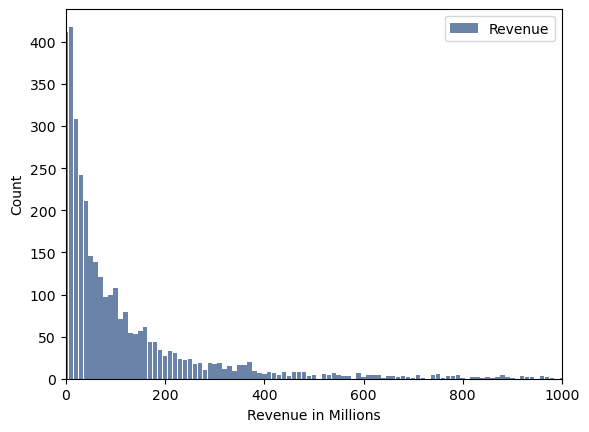

In [20]:
# Histogram for Revenue in Millions
histrevenue = thinkstats2.Hist(movierev, label='Revenue')
thinkplot.hist(histrevenue)
thinkplot.config(xlabel='Revenue in Millions', ylabel='Count', xlim=[0,1000])
print('Revenue Minimum', movierev.min())
print('Revenue Maximum', movierev.max())
print('Revenue Median', movierev.median())
print('Revenue Mean', movierev.mean())
print('Revenue Variance', movierev.var())
print('Revenue Standard Deviation', movierev.std())

Budget Minimum 0.0
Budget Maximum 380.0
Budget Median 20.0
Budget Median 38.779620853080566
Budget Variance 1975.1620853081517
Budget Standard Deviation 44.442795651355596


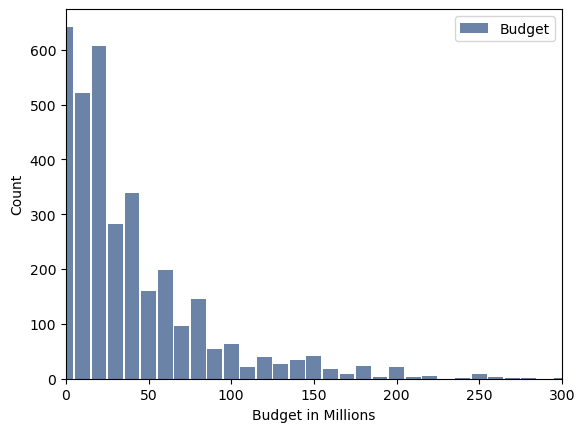

In [21]:
# Histogram for Budget in Millions
histrbudget = thinkstats2.Hist(moviebud, label='Budget')
thinkplot.hist(histrbudget)
thinkplot.config(xlabel='Budget in Millions', ylabel='Count', xlim=[0,300])
print('Budget Minimum', moviebud.min())
print('Budget Maximum', moviebud.max())
print('Budget Median', moviebud.median())
print('Budget Median', moviebud.mean())
print('Budget Variance', moviebud.var())
print('Budget Standard Deviation', moviebud.std())

C:\Users\caiti\anaconda3\Lib\site-packages\matplotlib\transforms.py:2038: RuntimeWarning: invalid value encountered in scalar add
  self._mtx[0, 2] += tx
C:\Users\caiti\anaconda3\Lib\site-packages\matplotlib\transforms.py:372: RuntimeWarning: invalid value encountered in scalar subtract
  return (x0, y0, x1 - x0, y1 - y0)


Profit Rate Minimum 0.00025596
Profit Rate Maximum inf
Profit Rate Median 2.447240476470588
Profit Rate Median inf
Profit Rate Variance nan
Profit Rate Standard Deviation nan


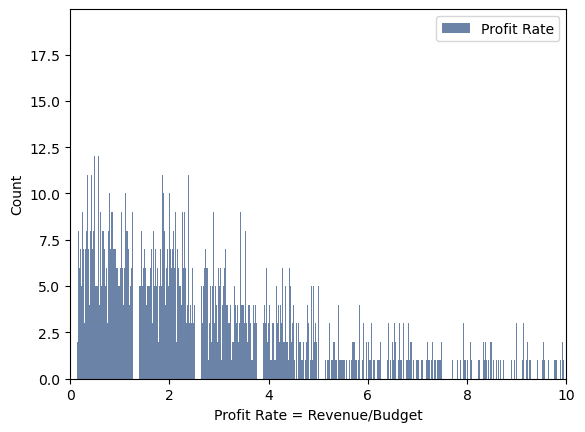

In [22]:
# Histogram for Profit Rate.  Values under 1 indicante no profit made
histprofit = thinkstats2.Hist(movieprofit, label='Profit Rate')
thinkplot.hist(histprofit)
thinkplot.config(xlabel='Profit Rate = Revenue/Budget', ylabel='Count', xlim=[0,10])
print('Profit Rate Minimum', movies2.ProfitRate.min())
print('Profit Rate Maximum', movies2.ProfitRate.max())
print('Profit Rate Median', movies2.ProfitRate.median())
print('Profit Rate Median', movies2.ProfitRate.mean())
print('Profit Rate Variance', movies2.ProfitRate.var())
print('Profit Rate Standard Deviation', movies2.ProfitRate.std())

Vote Minimum 0.0
Vote Maximum 10.0
Vote Median 6.3
Vote Median 6.308738151658767
Vote Variance 0.7784154739336512
Vote Standard Deviation 0.8822785693496421


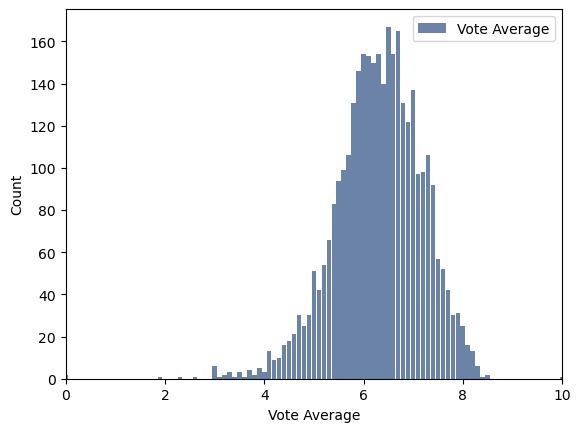

In [23]:
# Histogram for Average Vote
histvote = thinkstats2.Hist(movies2.vote_average, label='Vote Average')
thinkplot.hist(histvote)
thinkplot.config(xlabel='Vote Average', ylabel='Count', xlim=[0,10])
print('Vote Minimum', movies2.vote_average.min())
print('Vote Maximum', movies2.vote_average.max())
print('Vote Median', movies2.vote_average.median())
print('Vote Median', movies2.vote_average.mean())
print('Vote Variance', movies2.vote_average.var())
print('Vote Standard Deviation', movies2.vote_average.std())

Release Year Minimum 1916
Release Year Maximum 2016
Release Year Median 2005.0
Release Year Median 2001.8533767772512
Release Year Variance 172.1085693347377
Release Year Standard Deviation 13.119015562714212


C:\Users\caiti\AppData\Local\Temp\ipykernel_10628\1048970786.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies2['release_year'] = movies2['release_date'].dt.year


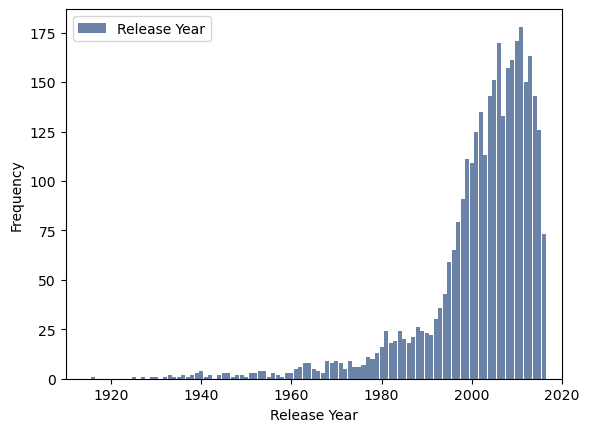

In [24]:
movies2['release_year'] = movies2['release_date'].dt.year
histyear = thinkstats2.Hist(movies2.release_year,label='Release Year')
thinkplot.hist(histyear)
thinkplot.Config(xlabel='Release Year', ylabel='Frequency', xlim=[1910, 2020])
print('Release Year Minimum', movies2.release_year.min())
print('Release Year Maximum', movies2.release_year.max())
print('Release Year Median', movies2.release_year.median())
print('Release Year Median', movies2.release_year.mean())
print('Release Year Variance', movies2.release_year.var())
print('Release Year Standard Deviation', movies2.release_year.std())

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5]),
 [Text(0.5, 0, 'Columbia Pictures'),
  Text(1.5, 0, 'MGM'),
  Text(2.5, 0, 'New Line Cinema'),
  Text(3.5, 0, 'Paramount'),
  Text(4.5, 0, 'Relativity Media'),
  Text(5.5, 0, 'Touchstone Pictures'),
  Text(6.5, 0, 'Twentieth Century'),
  Text(7.5, 0, 'Universal'),
  Text(8.5, 0, 'Walt Disney Pictures'),
  Text(9.5, 0, 'Warner Bros'),
  Text(10.5, 0, 'other')])

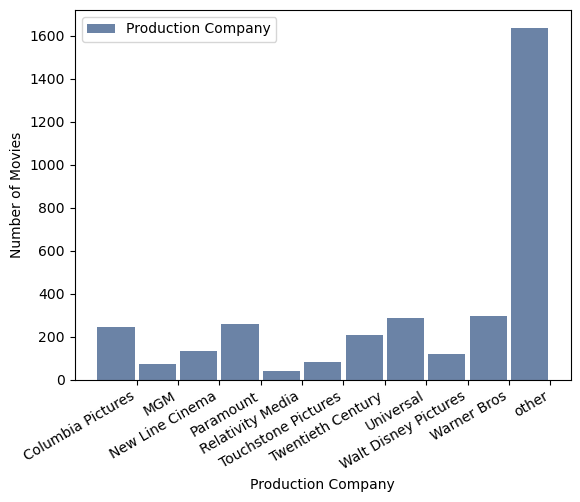

In [25]:
histpc = thinkstats2.Hist(movies2.PC_List,label='Production Company')
thinkplot.hist(histpc)
thinkplot.Config(xlabel='Production Company', ylabel='Number of Movies', xrotation=90)
plt.xticks(rotation=30, ha='right')


In [26]:
# Seperating by production company - Top 10 versus not
movies2["ProfitRateRounded"] = round(movies2.ProfitRate,2)
ProfRate = movies2[movies2.ProfitRateRounded >=0]
ProfRate = ProfRate.replace([np.inf, -np.inf], np.nan).dropna(axis=0)
TopPC =ProfRate[ProfRate.Top10 == 1]
OthPC =ProfRate[ProfRate.Top10 == 0]

C:\Users\caiti\AppData\Local\Temp\ipykernel_10628\1746780743.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies2["ProfitRateRounded"] = round(movies2.ProfitRate,2)


Probability Mass Function

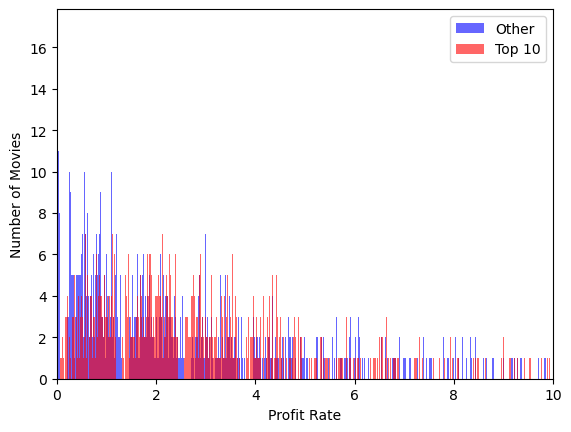

In [28]:
# Histogram by company
TopPC_hist = thinkstats2.Hist(TopPC.ProfitRateRounded, label='Top 10')
OthPC_hist = thinkstats2.Hist(OthPC.ProfitRateRounded, label='Other')
thinkplot.Hist(OthPC_hist, align='right', color = 'blue')
thinkplot.Hist(TopPC_hist, align='left', color = 'red')
thinkplot.Config(xlabel='Profit Rate', ylabel='Number of Movies', xlim=[0, 10])

In [29]:
# Data for PMF
n1 = TopPC_hist.Total()
pmfTOP = TopPC_hist.Copy()
for x, freq in TopPC_hist.Items():
    pmfTOP[x] = freq / n1

n2 = OthPC_hist.Total()
pmfOTH = OthPC_hist.Copy()
for x, freq in OthPC_hist.Items():
    pmfOTH[x] = freq / n2

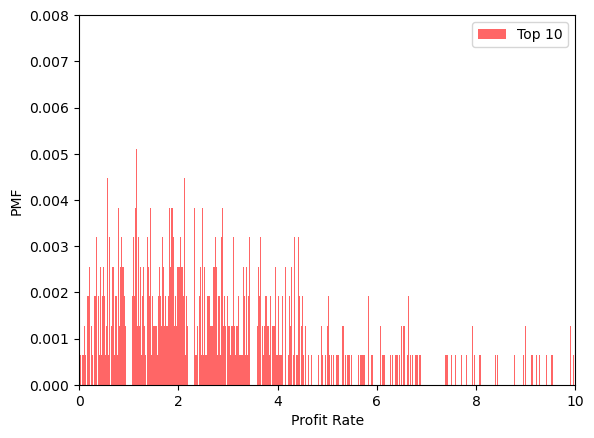

In [30]:
# PMF of Top 10
thinkplot.Hist(pmfTOP, color = 'red')
thinkplot.Config(xlabel="Profit Rate", ylabel="PMF", xlim=[0, 10], ylim =[0, 0.008])

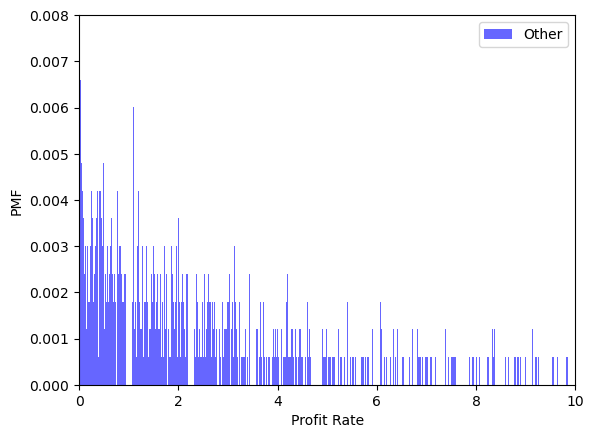

In [31]:
# PMF of Other
thinkplot.Hist(pmfOTH, color = 'blue')
thinkplot.Config(xlabel="Profit Rate", ylabel="PMF", xlim=[0, 10], ylim =[0, 0.008])

Cumulative Distribution Function

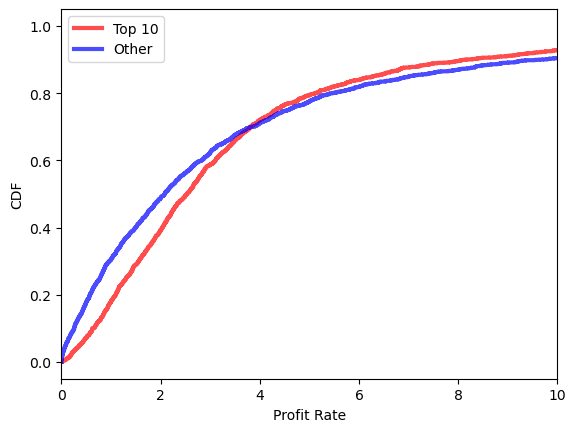

In [33]:
# Creating CDF lines for each group
TopPC_CDF = thinkstats2.Cdf(TopPC.ProfitRateRounded, label='Top 10')
OthPC_CDF = thinkstats2.Cdf(OthPC.ProfitRateRounded, label='Other')
thinkplot.PrePlot(2)
thinkplot.cdf(TopPC_CDF, color = 'red')
thinkplot.cdf(OthPC_CDF, color = 'blue')
thinkplot.Config(xlabel='Profit Rate', ylabel='CDF', xlim=[0, 10])


Normal Probablilty Plot

In [35]:
TopRev = TopPC.revenue
OthRev = OthPC.revenue
TopBud = TopPC.budget
OthBud = OthPC.budget

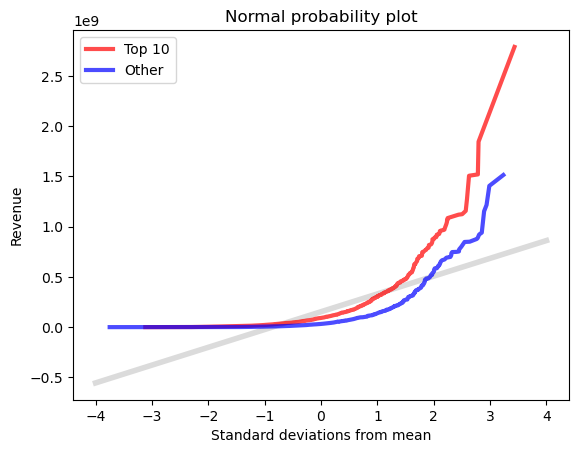

In [36]:
# Normal Probability Plot
TopNPP = TopPC.revenue
OthNPP = OthPC.revenue

mean, var = thinkstats2.TrimmedMeanVar(TopNPP, p=0.01)
std = np.sqrt(var)

xs = [-4, 4]
fxs, fys = thinkstats2.FitLine(xs, mean, std)
thinkplot.Plot(fxs, fys, linewidth=4, color="0.8")

thinkplot.PrePlot(2)
xs, ys = thinkstats2.NormalProbability(TopNPP)
thinkplot.Plot(xs, ys, label="Top 10", color = 'red')

xs, ys = thinkstats2.NormalProbability(OthNPP)
thinkplot.Plot(xs, ys, label="Other", color = 'blue')
thinkplot.Config(
    title="Normal probability plot",
    xlabel="Standard deviations from mean",
    ylabel="Revenue",
)

Scatter Plots and Relationships

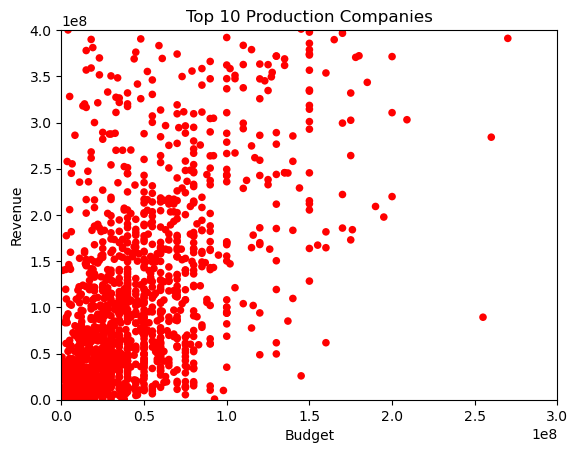

In [38]:
#Scatter Plot Budget vs Revenue Top 10
thinkplot.Scatter(TopBud, TopRev, alpha=1, color='red')
thinkplot.Config(xlabel='Budget',
                 ylabel='Revenue',
                 title="Top 10 Production Companies",
                 axis=[0, 300000000, 0, 400000000],
                 legend=False)

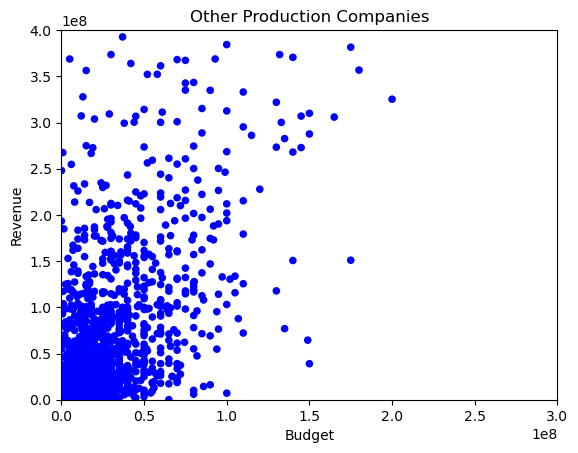

In [39]:
# Scatter Plot Budget vs Revenue Other
thinkplot.Scatter(OthBud, OthRev, alpha=1, color='blue')
thinkplot.Config(xlabel='Budget',
                 ylabel='Revenue',
                 title="Other Production Companies",
                 axis=[0, 300000000, 0, 400000000],
                 legend=False)

In [40]:
# Covariance Function
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

In [41]:
print('Covariance Top 10', Cov(TopBud, TopRev))

Covariance Top 10 7057449799192811.0


In [42]:
print('Covariance Other', Cov(OthBud, OthRev))

Covariance Other 3684038129702118.0


In [43]:
# Pearson's Correlation
def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

In [44]:
print('Pearsons Correlation Top 10', Corr(TopBud, TopRev))

Pearsons Correlation Top 10 0.6663449166360617


In [45]:
print('Pearsons Correlation Other', Corr(OthBud, OthRev))

Pearsons Correlation Other 0.730214523458628


In [46]:
# Spearmans Correlation
def SpearmanCorr(xs, ys):
    xranks = pd.Series(xs).rank()
    yranks = pd.Series(ys).rank()
    return Corr(xranks, yranks)

In [47]:
print('Spearman Correlation Top 10', SpearmanCorr(TopBud, TopRev))

Spearman Correlation Top 10 0.6264895329782866


In [48]:
print('Spearman Correlation Other', SpearmanCorr(OthBud, OthRev))

Spearman Correlation Other 0.6339632782734186


Hypothesis Testing

In [50]:
# Hypothesis Test
class HypothesisTest(object):

    def __init__(self, data):
        self.data = data
        self.MakeModel()
        self.actual = self.TestStatistic(data)

    def PValue(self, iters=1000):
        self.test_stats = [self.TestStatistic(self.RunModel()) 
                           for _ in range(iters)]

        count = sum(1 for x in self.test_stats if x >= self.actual)
        return count / iters

    def TestStatistic(self, data):
        raise UnimplementedMethodException()

    def MakeModel(self):
        pass

    def RunModel(self):
        raise UnimplementedMethodException()

In [51]:
# Permutation Test
class DiffMeansPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat

    def MakeModel(self):
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))

    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data

In [52]:
BudData = TopBud.values, OthBud.values

In [53]:
htBud = DiffMeansPermute(BudData)
Budpvalue = htBud.PValue()
print('Budget Permuation Test', Budpvalue)

Budget Permuation Test 0.0


In [54]:
RevData = TopRev.values, OthRev.values

In [55]:
htRev = DiffMeansPermute(RevData)
Revpvalue = htRev.PValue()
print('Revenue Permuation Test', Revpvalue)

Revenue Permuation Test 0.0


In [56]:
# Difference in Standard Deviation
class DiffStdPermute(DiffMeansPermute):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = group1.std() - group2.std()
        return test_stat

In [57]:
budht = DiffStdPermute(BudData)
budpvalue2 = budht.PValue()
budpvalue2

0.0

In [58]:
revht = DiffStdPermute(RevData)
revpvalue2 = revht.PValue()
revpvalue2

0.0

In [59]:
# Testing Correlation
class CorrelationPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        xs, ys = data
        test_stat = abs(thinkstats2.Corr(xs, ys))
        return test_stat

    def RunModel(self):
        xs, ys = self.data
        xs = np.random.permutation(xs)
        return xs, ys

In [60]:
Budht3 = DiffStdPermute(BudData)
Budpvalue3 = Budht3.PValue()
Budpvalue3

0.0

In [61]:
Revht3 = DiffStdPermute(RevData)
Revpvalue3 = Revht3.PValue()
Revpvalue3

0.0

Regression Analysis

In [63]:
from thinkstats2 import Mean, MeanVar, Var, Std, Cov

def LeastSquares(xs, ys):
    meanx, varx = MeanVar(xs)
    meany = Mean(ys)

    slope = Cov(xs, ys, meanx, meany) / varx
    inter = meany - slope * meanx

    return inter, slope

In [64]:
def FitLine(xs, inter, slope):
    fit_xs = np.sort(xs)
    fit_ys = inter + slope * fit_xs
    return fit_xs, fit_ys

In [65]:
interT, slopeT = LeastSquares(TopBud, TopRev)
interT, slopeT

(8182184.329094589, 2.8883781515825766)

In [66]:
fitT_xs, fitT_ys = FitLine(TopRev, interT, slopeT)

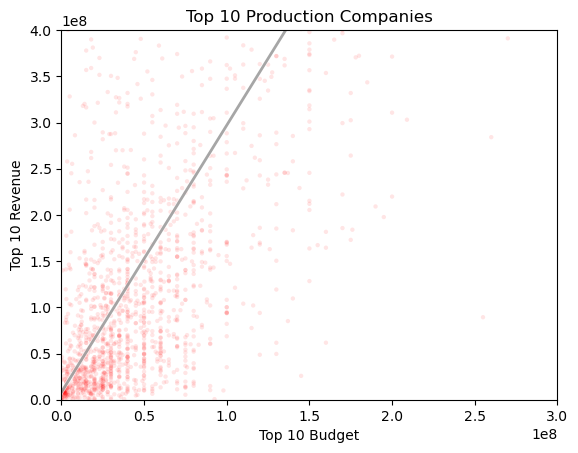

In [67]:
thinkplot.Scatter(TopBud, TopRev, color='red', alpha=0.1, s=10)
thinkplot.Plot(fitT_xs, fitT_ys, color='white', linewidth=3)
thinkplot.Plot(fitT_xs, fitT_ys, color='grey', linewidth=2)
thinkplot.Config(xlabel="Top 10 Budget",
                 ylabel='Top 10 Revenue',
                 title="Top 10 Production Companies",
                 axis=[0, 300000000, 0, 400000000],
                 legend=False)

In [68]:
interO, slopeO = LeastSquares(OthBud, OthRev)
interO, slopeO

(-4170562.551693961, 3.026724565547193)

In [69]:
fitO_xs, fitO_ys = FitLine(OthRev, interO, slopeO)

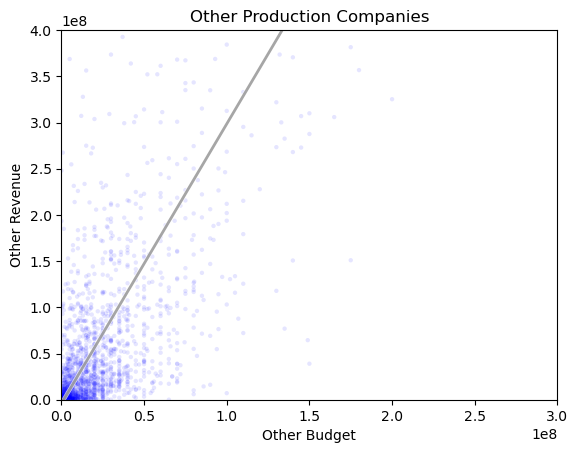

In [70]:
thinkplot.Scatter(OthBud, OthRev, color='blue', alpha=0.1, s=10)
thinkplot.Plot(fitO_xs, fitO_ys, color='white', linewidth=3)
thinkplot.Plot(fitO_xs, fitO_ys, color='grey', linewidth=2)
thinkplot.Config(xlabel="Other Budget",
                 ylabel='Other Revenue',
                 title="Other Production Companies",
                 axis=[0, 300000000, 0, 400000000],
                 legend=False)